# Info
Purpose:

    Check out the BRDF comparison of CAR to CERES from ARCTAS

Input:

    None

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2022-01-24
    Modified:


# Prepare python environment

In [3]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os


In [26]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [121]:
from datetime import datetime, timedelta

In [4]:
name = 'ARCTAS'
vv = 'v1'
fp = getpath(name)


Return path named:  ARCTAS /data/sam/arctas/


# Load files

In [111]:
os.listdir(fp+'nasa/20080409/')

['20080409_nasa_0.png',
 'car_p3b_20080409_r1_car2003.hdf',
 'pds_p3b_20080409_r2.zip',
 'SSFR_P3B_20080409_R0.ict',
 'Thumbs.db',
 'pds_p3b_20080409_ra.ict',
 'diff_flux_time.png',
 '20080409_calibspcs_attcorr.out',
 '20080409_nasa_irr.png',
 'SF20080409_BB_NASA P3.png',
 'ARCTAS_P3_map_20080409.png',
 'legs.txt',
 '20080409.log',
 '20080409_map.png',
 'AATS14_P3B_20080409_R2.ict',
 'pitch-n-roll_nasa.sav',
 'utc_raw_nasa.sav',
 'AATS14_P3B_20080409_RA.ict',
 'pds_p3b_20080409_r2.ict',
 'polar.cfg',
 'diff_flux_spc.png',
 'SF20080409__SP_NASA P3.PNG',
 'BBR_P3B_20080409_R0.ict',
 '20080409.nav',
 'CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.1_Subset_20080401-20080531.nc']

In [8]:
fpp = fp+'nasa/20080409/'

## Load P3 flight path

In [23]:
daystr = '20080409'

In [12]:
nav,nav_dict = lu.load_ict(fpp+'pds_p3b_20080409_r2.ict',return_header=True)

Seperation is set to a space
('Time', 'FMS_ALT_PRES', 'FMS_TAS', 'FMS_SAT', 'FMS_LAT', 'FMS_LON', 'FMS_GRD_SPD', 'FMS_HDG', 'FMS_TRK', 'FMS_WNS', 'FMS_WND', 'IRS_PITCH', 'IRS_ROLL', 'ADC_MACH', 'ADC_IAS', 'GPS_ALT', 'A_DP1011', 'A_TotalTempDegC', 'A_CabinPressure', 'A_SurfTemp', 'C_StaticPressure', 'C_DiffPressure', 'C_TotalTempDegK', 'C_StatTempDegK', 'C_StatTempDegC', 'C_PotTempDegK', 'C_CabAltitude', 'C_VaporPres', 'C_SatVaporPresWater', 'C_SatVaporPresIce', 'C_RelHumidityWater', 'C_RelHumidityIce', 'C_MixingRatio', 'C_CorrectRadarAlt')


In [164]:
lat_rg = [79.7,80.1]
lon_rg = [-101.1,-100.2]

In [80]:
ifl = np.where((nav['FMS_LON']<-100.2)&(nav['FMS_LON']>-101.1)&(nav['FMS_LAT']<80.1)&(nav['FMS_LAT']>79.7))[0]

In [81]:
ifl

array([10403, 10404, 10405, ..., 12197, 12198, 12199])

<IPython.core.display.Javascript object>


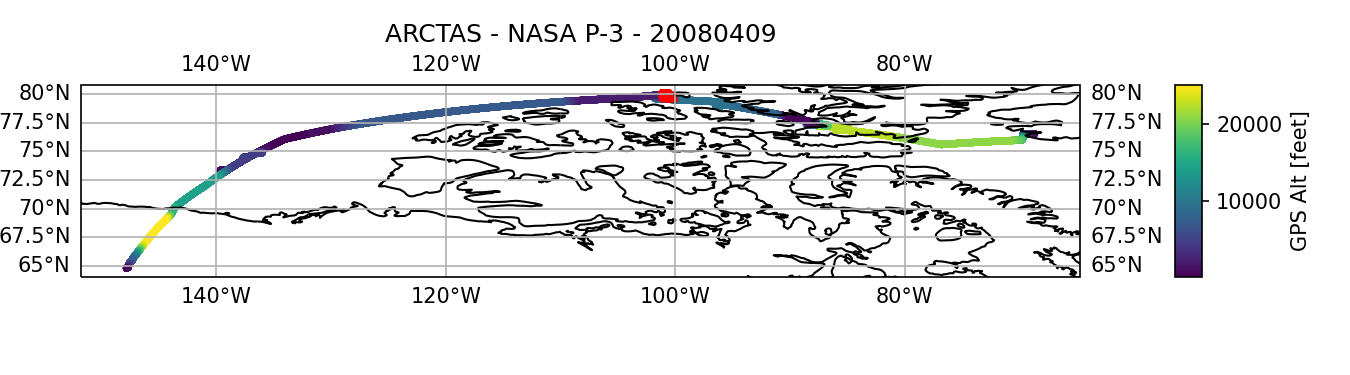

In [199]:
fig = plt.figure(figsize=(9,2.5))
proj = ccrs.PlateCarree()#(-120, 45)#(central_latitude=np.nanmean(nav['FMS_LAT']), central_longitude=np.nanmean(nav['FMS_LON']))
ax = fig.add_subplot(111,projection=proj)
axs = ax.scatter(nav['FMS_LON'],nav['FMS_LAT'],c=nav['GPS_ALT'],marker='o',s=6)
ax.scatter(nav['FMS_LON'][ifl],nav['FMS_LAT'][ifl],c='r',marker='x',s=12)

ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True,auto_update=True)

cbar_ax = fig.add_axes([0, 0, 0.1, 0.1])
fig.subplots_adjust(hspace=0.0, wspace=0, top=0.925, left=0.06)
posn = ax.get_position()
ax.set_position([posn.x0, posn.y0, posn.width-0.1, posn.height])
posn = ax.get_position()
cbar_ax.set_position([posn.x0 + posn.width + 0.07, posn.y0,
                          0.02, posn.height])

cbar = plt.colorbar(axs,cax=cbar_ax,label='GPS Alt [feet]')

ax.set_title('ARCTAS - NASA P-3 - {}'.format(daystr))
plt.savefig(fpp+'ARCTAS_P3_map_{}.png'.format(daystr),dpi=400,transparent=True)

In [90]:
nav['Time'][ifl]/3600.0

array([18.44805556, 18.44833333, 18.44861111, ..., 18.94638889,
       18.94666667, 18.94694444])

In [91]:
time = [nav['Time'][ifl[0]]/3600.0,nav['Time'][ifl[-1]]/3600.0]

## Load CAR

## Load CERES for Arctic April 2008

In [114]:
ceres,ceres_dict = lu.load_netcdf(fpp+'CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.1_Subset_20080401-20080531.nc',everything=True)

Reading file: /data/sam/arctas/nasa/20080409/CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.1_Subset_20080401-20080531.nc
Outputting the Data subdatasets:
0: time
1: lon
2: lat
3: toa_sw_clr_1h
4: toa_sw_all_1h
5: toa_lw_clr_1h
6: toa_lw_all_1h
7: toa_wn_clr_1h
8: toa_wn_all_1h
9: toa_net_clr_1h
10: toa_net_all_1h
11: toa_alb_clr_1h
12: toa_alb_all_1h
13: toa_solar_all_1h
14: ini_sfc_sw_up_clr_1h
15: ini_sfc_sw_up_all_1h
16: ini_sfc_sw_up_pri_1h
17: ini_sfc_sw_up_naer_1h
18: ini_sfc_sw_down_clr_1h
19: ini_sfc_sw_down_all_1h
20: ini_sfc_sw_down_pri_1h
21: ini_sfc_sw_down_naer_1h
22: ini_sfc_lw_up_clr_1h
23: ini_sfc_lw_up_all_1h
24: ini_sfc_lw_up_pri_1h
25: ini_sfc_lw_up_naer_1h
26: ini_sfc_lw_down_clr_1h
27: ini_sfc_lw_down_all_1h
28: ini_sfc_lw_down_pri_1h
29: ini_sfc_lw_down_naer_1h
30: ini_precip_1h
31: ini_uth_1h
32: ini_albedo_1h
33: ini_skint_1h
34: ini_aod55_1h
35: ini_aod84_1h
36: ini_surfpress_1h
37: ini_ozone_1h
38: adj_atmos_sw_up_all_toa_1h
39: adj_atmos_sw_up_all_70mb_1h
40: adj_atm

/home/sam/python_codes/load_utils.py:1242: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  # In[ ]:
/home/sam/python_codes/load_utils.py:1242: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  # In[ ]:


[b'time', b'lon', b'lat', b'toa_sw_clr_1h', b'toa_sw_all_1h', b'toa_lw_clr_1h', b'toa_lw_all_1h', b'toa_wn_clr_1h', b'toa_wn_all_1h', b'toa_net_clr_1h', b'toa_net_all_1h', b'toa_alb_clr_1h', b'toa_alb_all_1h', b'toa_solar_all_1h', b'ini_sfc_sw_up_clr_1h', b'ini_sfc_sw_up_all_1h', b'ini_sfc_sw_up_pri_1h', b'ini_sfc_sw_up_naer_1h', b'ini_sfc_sw_down_clr_1h', b'ini_sfc_sw_down_all_1h', b'ini_sfc_sw_down_pri_1h', b'ini_sfc_sw_down_naer_1h', b'ini_sfc_lw_up_clr_1h', b'ini_sfc_lw_up_all_1h', b'ini_sfc_lw_up_pri_1h', b'ini_sfc_lw_up_naer_1h', b'ini_sfc_lw_down_clr_1h', b'ini_sfc_lw_down_all_1h', b'ini_sfc_lw_down_pri_1h', b'ini_sfc_lw_down_naer_1h', b'ini_precip_1h', b'ini_uth_1h', b'ini_albedo_1h', b'ini_skint_1h', b'ini_aod55_1h', b'ini_aod84_1h', b'ini_surfpress_1h', b'ini_ozone_1h', b'adj_atmos_sw_up_all_toa_1h', b'adj_atmos_sw_up_all_70mb_1h', b'adj_atmos_sw_up_all_200mb_1h', b'adj_atmos_sw_up_all_500mb_1h', b'adj_atmos_sw_up_all_850mb_1h', b'adj_atmos_sw_up_all_surface_1h', b'adj_atmos_

In [122]:
ceres_dict[b'aux_snow_1h']

<class 'netCDF4._netCDF4.Variable'>
float32 aux_snow_1h(time, lat, lon)
    _FillValue: -999.0
    long_name: Surface Parameters Information Data: Snow/Ice Percent Coverage, Hourly Daily Means
    standard_name: Surface Data Snow/Ice Percent Coverage
    units: percent
    valid_min:        0
    valid_max:      100
unlimited dimensions: 
current shape = (1464, 12, 70)
filling on

In [117]:
ceres[b'adj_atmos_sw_up_all_surface_1h'].shape

(1464, 12, 70)

In [197]:
ceres_dict[b'ini_albedo_1h']

<class 'netCDF4._netCDF4.Variable'>
float32 ini_albedo_1h(time, lat, lon)
    _FillValue: -999.0
    long_name: Initial Meteorological Parameters: Surface Albedo, Hourly Daily Means
    standard_name: Initial Surface Albedo
    units: dimensionless
    valid_min:        0
    valid_max:        1
unlimited dimensions: 
current shape = (1464, 12, 70)
filling on

### Convert to useable time units

In [120]:
ceres_dict[b'time']

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: Time
    standard_name: time
    units: days since 2000-03-01 00:00:00
    delta_t: 0000-00-01 00:00:00
unlimited dimensions: 
current shape = (1464,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [118]:
ceres[b'time']

masked_array(data=[2953.0208, 2953.0625, 2953.1042, ..., 3013.8958,
                   3013.9375, 3013.9792],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [158]:
time2date = lambda x : datetime(2000,3,1)+timedelta(days=1)*x

In [159]:
ceres_date = time2date(ceres[b'time'])

In [160]:
ceres_date[0:3]

masked_array(data=[datetime.datetime(2008, 4, 1, 0, 29, 52, 968750),
                   datetime.datetime(2008, 4, 1, 1, 30),
                   datetime.datetime(2008, 4, 1, 2, 30, 7, 31250)],
             mask=False,
       fill_value=1e+20,
            dtype=object)

### find region subset

In [162]:
ceres[b'lon']

masked_array(data=[220.5, 221.5, 222.5, 223.5, 224.5, 225.5, 226.5, 227.5,
                   228.5, 229.5, 230.5, 231.5, 232.5, 233.5, 234.5, 235.5,
                   236.5, 237.5, 238.5, 239.5, 240.5, 241.5, 242.5, 243.5,
                   244.5, 245.5, 246.5, 247.5, 248.5, 249.5, 250.5, 251.5,
                   252.5, 253.5, 254.5, 255.5, 256.5, 257.5, 258.5, 259.5,
                   260.5, 261.5, 262.5, 263.5, 264.5, 265.5, 266.5, 267.5,
                   268.5, 269.5, 270.5, 271.5, 272.5, 273.5, 274.5, 275.5,
                   276.5, 277.5, 278.5, 279.5, 280.5, 281.5, 282.5, 283.5,
                   284.5, 285.5, 286.5, 287.5, 288.5, 289.5],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [163]:
ceres[b'lat']

masked_array(data=[70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5,
                   79.5, 80.5, 81.5],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [168]:
lat_rg,lon_rg[0]+360.0,lon_rg[1]+360.0

([79.7, 80.1], 258.9, 259.8)

In [171]:
ceres[b'lat'][9],ceres[b'lon'][39]

(79.5, 259.5)

In [172]:
ilat = 9
ilon = 39

### plot out time series

In [192]:
time_dt = [datetime(2008,4,9)+timedelta(hours=time[0]),datetime(2008,4,9)+timedelta(hours=time[1])]

<IPython.core.display.Javascript object>


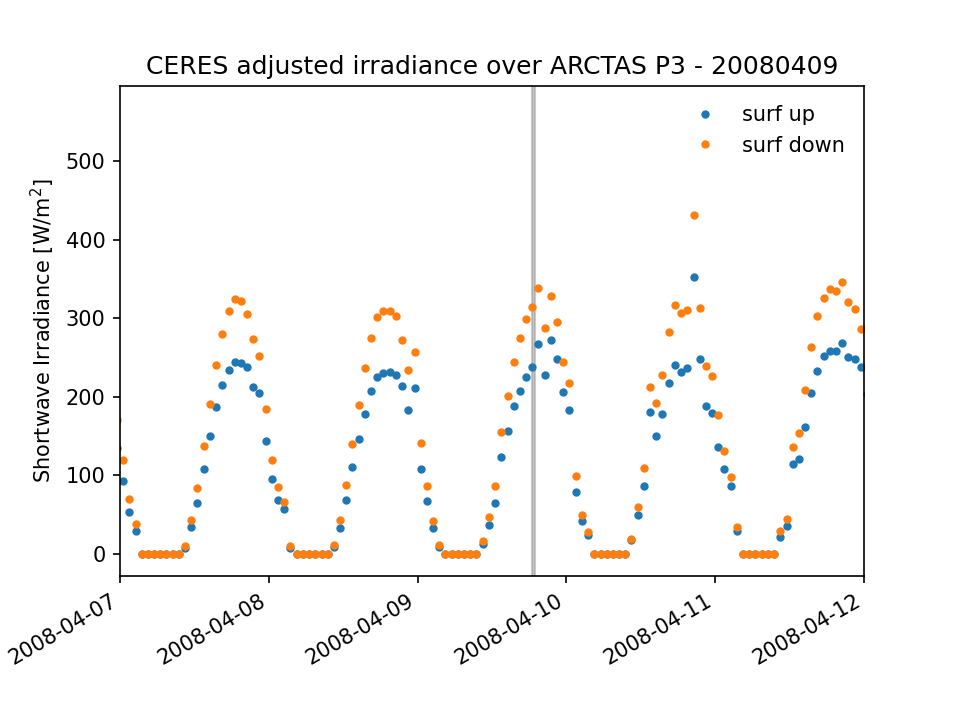

In [193]:
fig = plt.figure()
plt.plot(ceres_date,ceres[b'adj_atmos_sw_up_all_surface_1h'][:,ilat,ilon],'.',label='surf up')
plt.plot(ceres_date,ceres[b'adj_atmos_sw_down_all_surface_1h'][:,ilat,ilon],'.',label='surf down')
plt.ylabel('Shortwave Irradiance [W/m$^2$]')
plt.xlim([datetime(2008,4,7),datetime(2008,4,12)])
fig.autofmt_xdate()
plt.legend(frameon=False)
plt.title('CERES adjusted irradiance over ARCTAS P3 - {}'.format(daystr))
plt.axvspan(time_dt[0],time_dt[1],alpha=0.4,color='grey',label='Spiral')

<IPython.core.display.Javascript object>


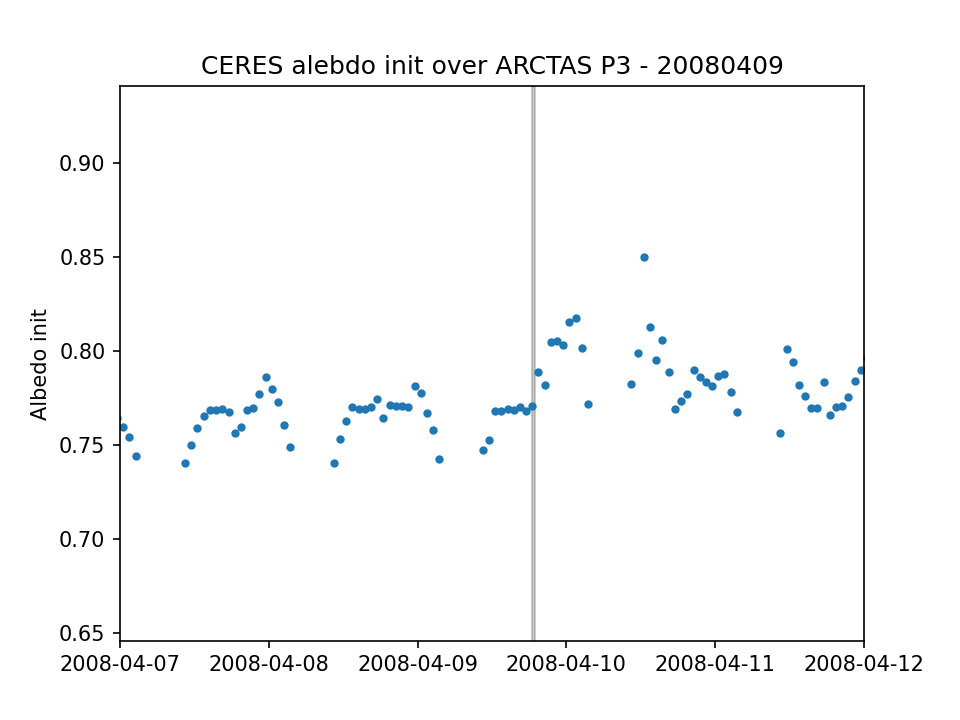

In [194]:
plt.figure()
plt.plot(ceres_date,ceres[b'ini_albedo_1h'][:,ilat,ilon],'.')
plt.ylabel('Albedo init')
plt.xlim([datetime(2008,4,7),datetime(2008,4,12)])
fig.autofmt_xdate()
plt.title('CERES alebdo init over ARCTAS P3 - {}'.format(daystr))
plt.axvspan(time_dt[0],time_dt[1],alpha=0.4,color='grey',label='Spiral')

<IPython.core.display.Javascript object>


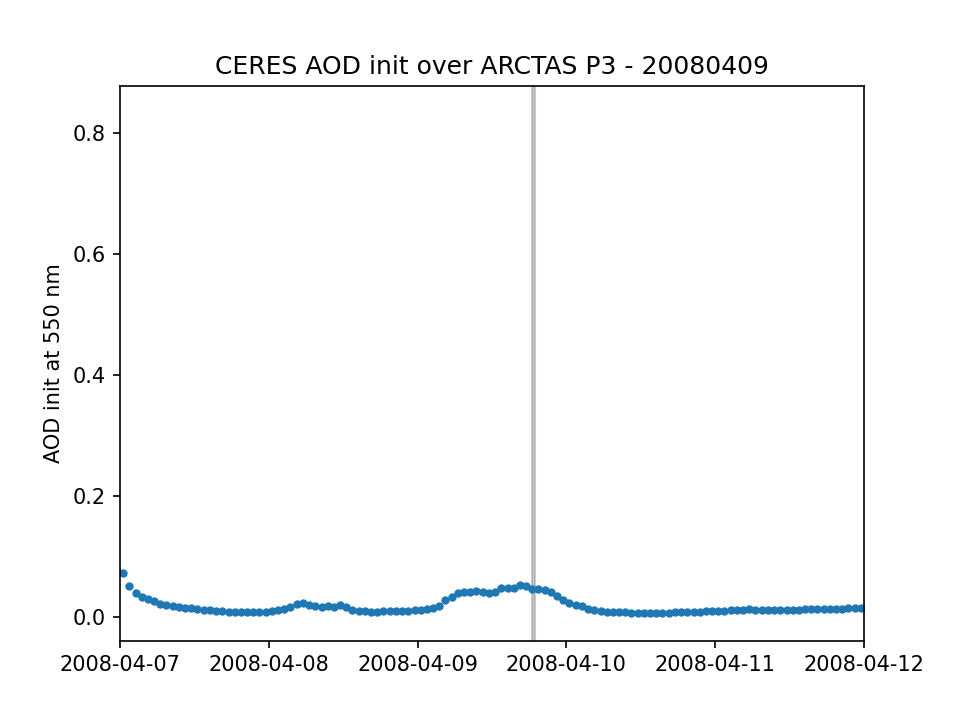

In [196]:
plt.figure()
plt.plot(ceres_date,ceres[b'ini_aod55_1h'][:,ilat,ilon],'.')
plt.ylabel('AOD init at 550 nm')
plt.xlim([datetime(2008,4,7),datetime(2008,4,12)])
fig.autofmt_xdate()
plt.title('CERES AOD init over ARCTAS P3 - {}'.format(daystr))
plt.axvspan(time_dt[0],time_dt[1],alpha=0.4,color='grey',label='Spiral')

<IPython.core.display.Javascript object>


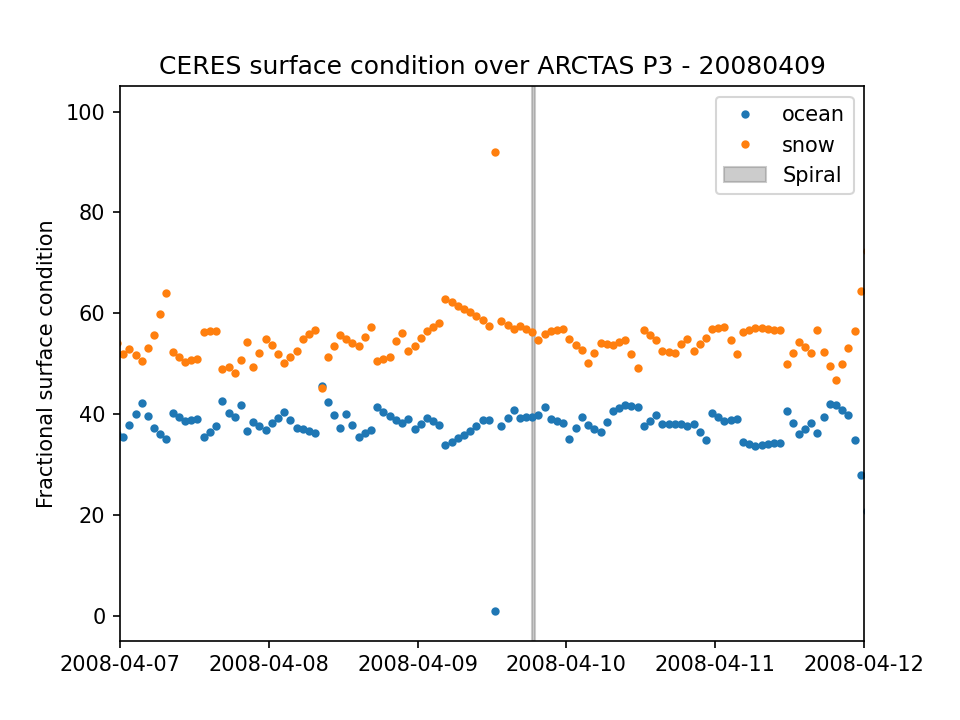

In [198]:
plt.figure()
plt.plot(ceres_date,ceres[b'aux_ocean_1h'][:,ilat,ilon],'.',label='ocean')
plt.plot(ceres_date,ceres[b'aux_snow_1h'][:,ilat,ilon],'.',label='snow')
plt.ylabel('Fractional surface condition')
plt.xlim([datetime(2008,4,7),datetime(2008,4,12)])
fig.autofmt_xdate()
plt.title('CERES surface condition over ARCTAS P3 - {}'.format(daystr))
plt.axvspan(time_dt[0],time_dt[1],alpha=0.4,color='grey',label='Spiral')
plt.legend()

## Load SSFR surface albedo ict file

In [85]:
ssfr, ssfr_dict = lu.load_ict(fpp+'SSFR_P3B_20080409_R0.ict',return_header=True)

Seperation is set to a space
('UTC', 'DN380', 'DN500', 'DN1200', 'DN_BB350_700', 'DN_BB350_2150', 'UP380', 'UP500', 'UP1200', 'UP_BB350_700', 'UP_BB350_2150')


### plot out time series

<IPython.core.display.Javascript object>


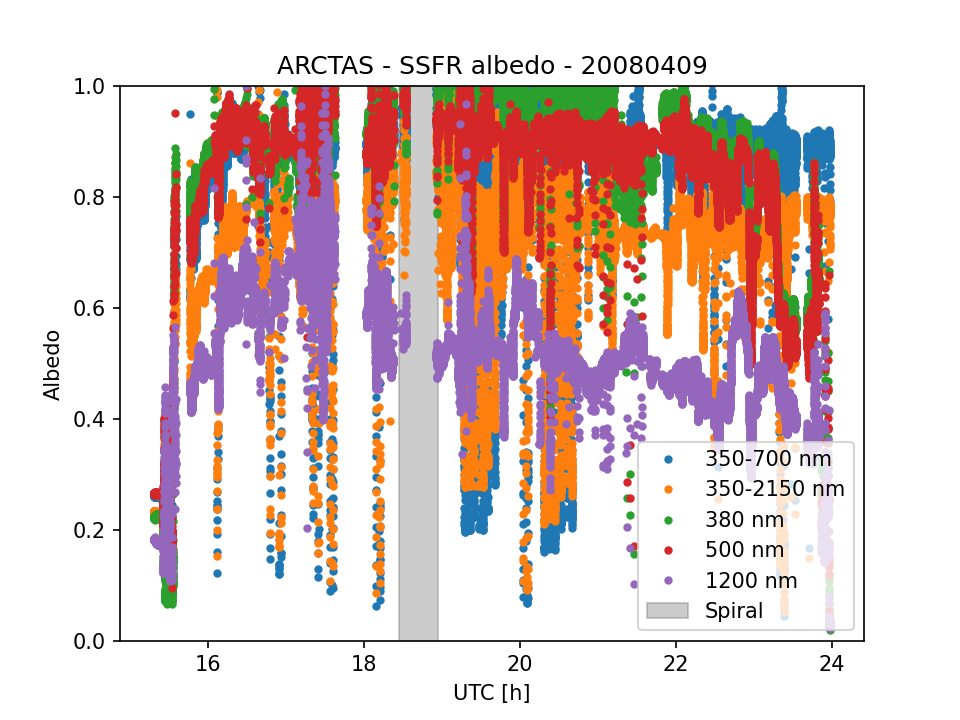

Text(0.5, 1.0, 'ARCTAS - SSFR albedo - 20080409')

In [96]:
plt.figure()
plt.plot(ssfr['UTC'],ssfr['UP_BB350_700']/ssfr['DN_BB350_700'],'.',label='350-700 nm')
plt.plot(ssfr['UTC'],ssfr['UP_BB350_2150']/ssfr['DN_BB350_2150'],'.',label='350-2150 nm')
plt.plot(ssfr['UTC'],ssfr['UP380']/ssfr['DN380'],'.',label='380 nm')
plt.plot(ssfr['UTC'],ssfr['UP500']/ssfr['DN500'],'.',label='500 nm')
plt.plot(ssfr['UTC'],ssfr['UP1200']/ssfr['DN1200'],'.',label='1200 nm')

plt.axvspan(time[0],time[1],alpha=0.4,color='grey',label='Spiral')

plt.xlabel('UTC [h]')
plt.ylabel('Albedo')
plt.ylim(0,1)
plt.legend(frameon=True)
plt.title('ARCTAS - SSFR albedo - {}'.format(daystr))

## Load BBR

In [103]:
bbr, bbr_dict = lu.load_ict(fpp+'BBR_P3B_20080409_R0.ict',return_header=True)

Seperation is set to a space
('Time_UTC_secs', 'Downwelling_IR_Irradiance_Wm2', 'Upwelling_IR_Irradiance_Wm2', 'Downwelling_SOLAR_Irradiance_Wm2', 'Upwelling_SOLAR_Irradiance_Wm2')


In [105]:
bbr_dict

['46 1001 \t\t\t\t\t\t\t; header lines, data format\n',
 'Bucholtz, Anthony \t\t\t\t\t\t; name of instrument Principal Investigator\n',
 'Naval Research Laboratory\t\t\t\t\t; affiliation of instrument Principal Investigator\n',
 'Solar and Infrared Broadband Radiometers (BBR) on the NASA P3\t; Data source \n',
 'ARCTAS \t\t\t\t\t\t\t\t; mission name\n',
 '1 1 \t\t\t\t\t\t\t\t; ivol nvol\n',
 '2008 04 09     2009 04 07 \t\t\t\t\t; flight date and reduction/archival date\n',
 '      1.00000\t\t\t\t\t\t\t; data interval (seconds) \n',
 'UTC time, seconds \t\t\t\t\t\t; independent variable; times greater or equal to 86400 refer to the next day\n',
 '          4\n',
 '1. 1. 1. 1. \t\t\t\t\t\t\t; primary variable scale factors\n',
 '-9999. -9999. -9999.  -9999.\t\t\t\t\t; primary variable missing values\n',
 'Downwelling Broadband IR Irradiance (4.5-42 microns), W m^-2\n',
 'Upwelling   Broadband IR Irradiance (4.5-42 microns), W m^-2\n',
 'Downwelling Broadband Solar Irradiance (0.2-3.6 mic

### plot time series

<IPython.core.display.Javascript object>


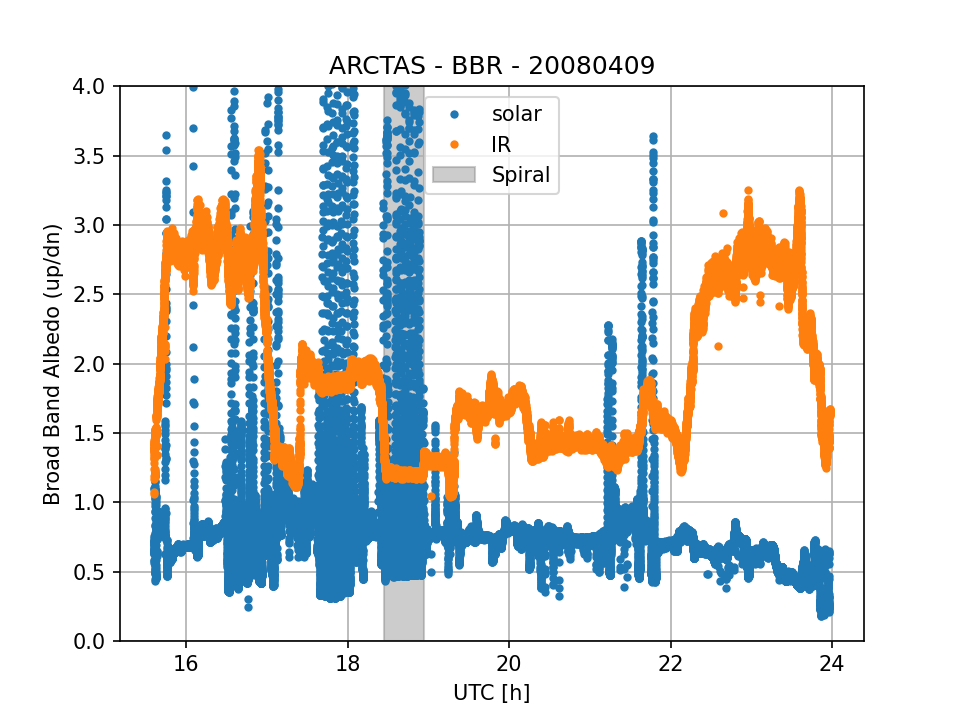

Text(0.5, 1.0, 'ARCTAS - BBR - 20080409')

In [108]:
plt.figure()
plt.plot(bbr['Time_UTC_secs']/3600.0,bbr['Upwelling_SOLAR_Irradiance_Wm2']/bbr['Downwelling_SOLAR_Irradiance_Wm2'],'.',label='solar')
plt.plot(bbr['Time_UTC_secs']/3600.0,bbr['Upwelling_IR_Irradiance_Wm2']/bbr['Downwelling_IR_Irradiance_Wm2'],'.',label='IR')

plt.axvspan(time[0],time[1],alpha=0.4,color='grey',label='Spiral')

plt.xlabel('UTC [h]')
plt.ylabel('Broad Band Albedo (up/dn)')
plt.ylim(0,4.0)
plt.grid()
plt.legend(frameon=True)
plt.title('ARCTAS - BBR - {}'.format(daystr))

<IPython.core.display.Javascript object>


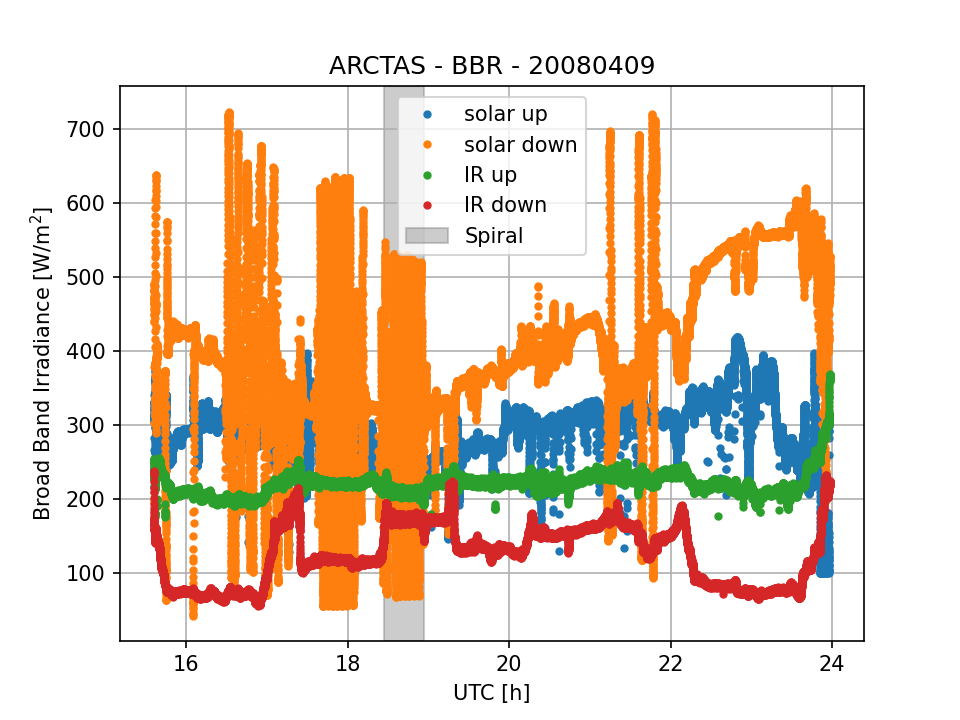

Text(0.5, 1.0, 'ARCTAS - BBR - 20080409')

In [110]:
plt.figure()
plt.plot(bbr['Time_UTC_secs']/3600.0,bbr['Upwelling_SOLAR_Irradiance_Wm2'],'.',label='solar up')
plt.plot(bbr['Time_UTC_secs']/3600.0,bbr['Downwelling_SOLAR_Irradiance_Wm2'],'.',label='solar down')
plt.plot(bbr['Time_UTC_secs']/3600.0,bbr['Upwelling_IR_Irradiance_Wm2'],'.',label='IR up')
plt.plot(bbr['Time_UTC_secs']/3600.0,bbr['Downwelling_IR_Irradiance_Wm2'],'.',label='IR down')

plt.axvspan(time[0],time[1],alpha=0.4,color='grey',label='Spiral')

plt.xlabel('UTC [h]')
plt.ylabel('Broad Band Irradiance [W/m$^2$]')
#plt.ylim(0,4.0)
plt.grid()
plt.legend(frameon=True)
plt.title('ARCTAS - BBR - {}'.format(daystr))

## Load AATS-14 AOD

In [97]:
aats,aats_dict = lu.load_ict(fpp+'AATS14_P3B_20080409_R2.ict',return_header=True)

Seperation is set to a space
('Start_UTC', 'Stop_UTC', 'Mid_UTC', 'Latitude', 'Longitude', 'GPS_alt', 'P_alt', 'Stat_p', 'CWV', 'unc_CWV', 'O3_col', 'unc_O3', 'cld_scr', 'a2', 'a1', 'a0', 'AOD354', 'AOD380', 'AOD453', 'AOD499', 'AOD519', 'AOD606', 'AOD675', 'AOD779', 'AOD865', 'AOD1019', 'AOD1241', 'AOD1559', 'AOD2139', 'u_AOD353', 'u_AOD380', 'u_AOD452', 'u_AOD499', 'u_AOD519', 'u_AOD606', 'u_AOD675', 'u_AOD779', 'u_AOD865', 'u_AOD1019', 'u_AOD1241', 'u_AOD1559', 'u_AOD2139')


### plot time series

<IPython.core.display.Javascript object>


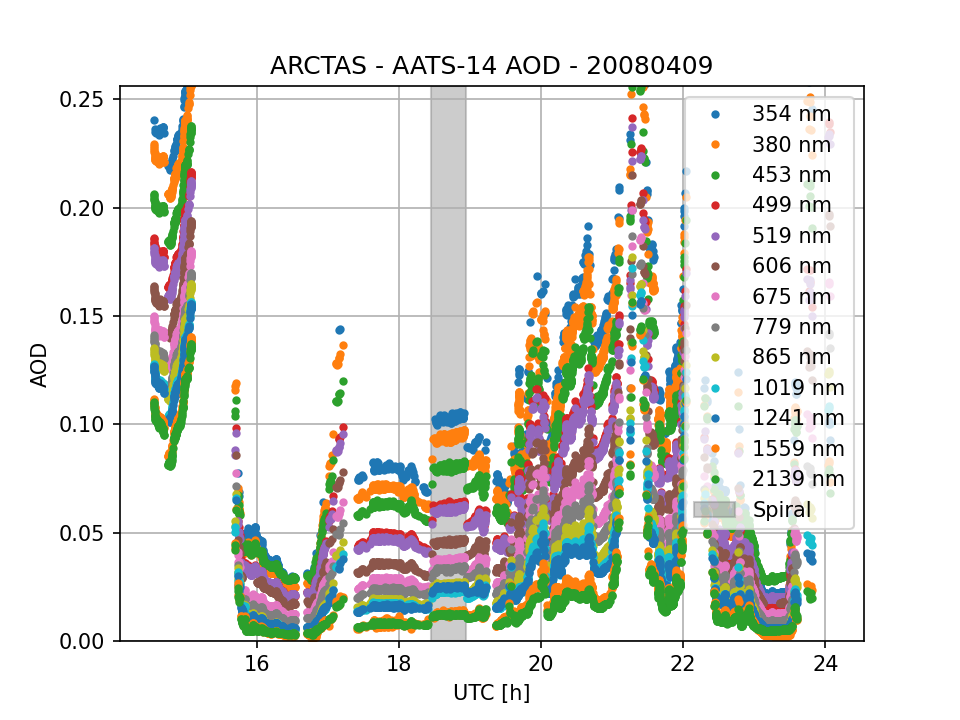

Text(0.5, 1.0, 'ARCTAS - AATS-14 AOD - 20080409')

In [100]:
plt.figure()
fqa = aats['cld_scr']>0
plt.plot(aats['Start_UTC'][fqa],aats['AOD354'][fqa],'.',label='354 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD380'][fqa],'.',label='380 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD453'][fqa],'.',label='453 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD499'][fqa],'.',label='499 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD519'][fqa],'.',label='519 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD606'][fqa],'.',label='606 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD675'][fqa],'.',label='675 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD779'][fqa],'.',label='779 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD865'][fqa],'.',label='865 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD1019'][fqa],'.',label='1019 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD1241'][fqa],'.',label='1241 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD1559'][fqa],'.',label='1559 nm')
plt.plot(aats['Start_UTC'][fqa],aats['AOD2139'][fqa],'.',label='2139 nm')

plt.axvspan(time[0],time[1],alpha=0.4,color='grey',label='Spiral')

plt.xlabel('UTC [h]')
plt.ylabel('AOD')
plt.ylim(0,0.256)
plt.grid()
plt.legend(frameon=True)
plt.title('ARCTAS - AATS-14 AOD - {}'.format(daystr))

# Subset data for the same time periods

# Plot out data